In [3]:
import torch
import torch.nn as nn
from torchsummary import summary

In [6]:
class Regression3DConvNet(nn.Module):
    def __init__(self):
        super(Regression3DConvNet, self).__init__()

        # 3D Convolutional Layers
        self.conv1 = nn.Conv3d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv3d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv3d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv3d(256, 512, kernel_size=3, padding=1)

        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * 14 * 12 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 6)  # Output size is 6 for regression task

    def forward(self, x):
        # Input: (batch_size, channels, depth, height, width)
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool3d(x, kernel_size=2, stride=2)

        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool3d(x, kernel_size=2, stride=2)

        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool3d(x, kernel_size=2, stride=2)

        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool3d(x, kernel_size=2, stride=2)

        x = self.conv5(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool3d(x, kernel_size=2, stride=2)

        # Flatten before passing through fully connected layers
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = nn.functional.relu(x)

        x = self.fc2(x)
        x = nn.functional.relu(x)

        x = self.fc3(x)

        return x

In [7]:
# Instantiate the model
model = Regression3DConvNet()

In [8]:
# Print the model architecture
summary(model, input_size=(1, 14, 12, 4))

RuntimeError: Given input size: (128x3x3x1). Calculated output size: (128x1x1x0). Output size is too small

In [1]:
import torch
import torch.nn as nn
from torchviz import make_dot


class RegressionNetwork(nn.Module):
    def __init__(self):
        super(RegressionNetwork, self).__init__()

        # 3D Convolutional Layers
        self.conv1 = nn.Conv3d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv3d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv3d(256, 512, kernel_size=3, stride=1, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(14 * 12 * 4 * 512, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 6)  # Output has 6 dimensions for regression task

    def forward(self, x):
        # Input shape: (batch_size, 1, 14, 12, 4)

        # Apply 3D convolutions
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))

        # Reshape for fully connected layers
        x = x.view(-1, 14 * 12 * 4 * 512)

        # Apply fully connected layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)

        return x


# Create an instance of the model
model = RegressionNetwork()

# Define dummy input
dummy_input = torch.randn(1, 1, 14, 12, 4)

# Visualize the architecture
output = model(dummy_input)

# vis_graph = make_dot(output, params=dict(model.named_parameters()))
# vis_graph.render("3DConvRegressionNetwork", format="png", cleanup=True)

'3DConvRegressionNetwork.png'

In [5]:
summary(model, input_size=(1, 14, 12, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1        [-1, 32, 14, 12, 4]             896
            Conv3d-2        [-1, 64, 14, 12, 4]          55,360
            Conv3d-3       [-1, 128, 14, 12, 4]         221,312
            Conv3d-4       [-1, 256, 14, 12, 4]         884,992
            Conv3d-5       [-1, 512, 14, 12, 4]       3,539,456
            Linear-6                 [-1, 1024]     352,322,560
            Linear-7                  [-1, 256]         262,400
            Linear-8                    [-1, 6]           1,542
Total params: 357,288,518
Trainable params: 357,288,518
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 5.10
Params size (MB): 1362.95
Estimated Total Size (MB): 1368.05
----------------------------------------------------------------


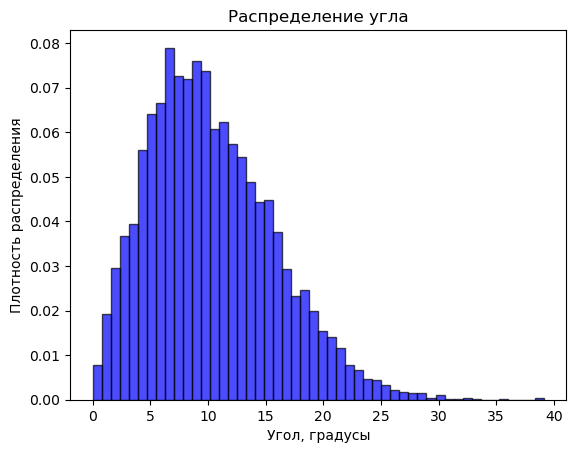

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем несколько параметров масштаба
scale_param = 0.144 * 180 / np.pi

# Генерируем выборки с разными параметрами масштаба
sample_size = 8000
rayleigh_samples = np.random.rayleigh(scale_param, sample_size)  #+ np.random.normal(scale=1.0, size=sample_size)

# rayleigh_samples = np.random.normal(scale=0.5, size=sample_size)

# Визуализация выборок
plt.hist(rayleigh_samples, bins=50, density=True, alpha=0.7, color='b', edgecolor='black')

plt.title('Распределение угла')
plt.xlabel('Угол, градусы')
plt.ylabel('Плотность распределения')
plt.show()


In [39]:
rayleigh_samples.mean()

10.33446481451624

In [40]:
rayleigh_samples.std()

5.444288053474066

In [66]:
samples = rayleigh_samples
while np.abs(samples.mean() - 10.3) > 0.03 and np.abs(samples.std() - 4.6) > 0.03:
    samples = np.random.rayleigh(scale_param, sample_size)

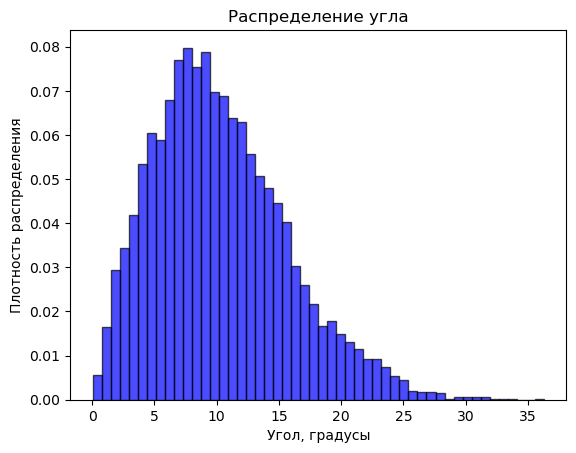

In [67]:
# Визуализация выборок
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b', edgecolor='black')

plt.title('Распределение угла')
plt.xlabel('Угол, градусы')
plt.ylabel('Плотность распределения')
plt.show()